In [14]:
import requests
from requests import Session
from requests.exceptions import HTTPError
import pprint
import json
import time
import pandas as pd
from random import uniform
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('pitch_data_2018.org.csv')

In [25]:
df

,rowid,season,game,batter,batSide,count_balls,count_strikes,pitch_result,pitch_type,break_angle,break_length,spin_direction,spin_rate,end_speed,extension,plate_time,start_speed,pitch_number
0,0,2018,529407,544931,R,0,1,C,FF,36.0,4.8,220,2082.0,86.0,6.85,0.40,93.5,1
1,1,2018,529407,544931,R,0,2,S,FF,37.2,3.6,212,2171.0,86.3,6.62,0.40,94.1,2
2,2,2018,529407,544931,R,1,2,B,FF,38.4,3.6,214,2194.0,86.1,6.65,0.40,94.0,3
3,3,2018,529407,544931,R,1,3,S,CH,30.0,8.4,255,1873.0,81.7,7.13,0.42,88.2,4
4,4,2018,529407,544931,R,0,1,C,CU,15.6,12.0,63,2716.0,74.4,6.57,0.47,80.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917698,917698,2018,570335,607625,R,2,2,S,SL,6.0,6.0,156,2388.0,80.2,5.93,0.44,86.4,4
917699,917699,2018,570335,607625,R,2,2,F,CU,10.8,14.4,33,3305.0,72.9,5.76,0.48,79.8,5
917700,917700,2018,570335,607625,R,2,2,F,FF,22.8,3.6,199,2279.0,85.5,5.98,0.40,93.9,6
917701,917701,2018,570335,607625,R,2,2,E,SL,4.8,7.2,144,2455.0,82.0,5.61,0.43,88.3,7


In [7]:
df.columns

Index(['rowid', 'season', 'game', 'batter', 'batSide', 'count_balls',
       'count_strikes', 'pitch_result', 'pitch_type', 'break_angle',
       'break_length', 'spin_direction', 'spin_rate', 'end_speed', 'extension',
       'plate_time', 'start_speed', 'pitch_number'],
      dtype='object')

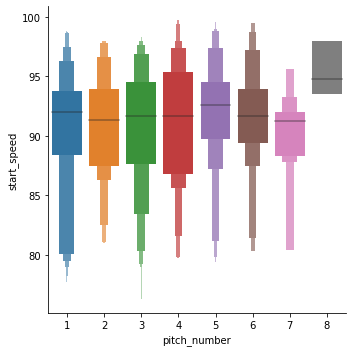

In [3]:
sns.catplot(x="pitch_number", y="start_speed", kind="boxen",
            data=df.sort_values("pitch_number"));

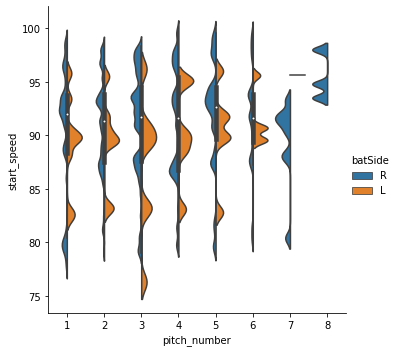

In [8]:
sns.catplot(x="pitch_number", y="start_speed", hue="batSide",
            kind="violin", split=True, data=df);

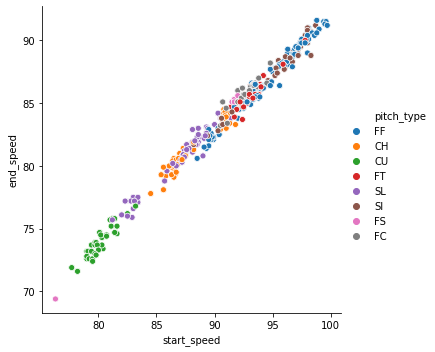

In [9]:
sns.relplot(x="start_speed",y="end_speed",hue="pitch_type",data=df)

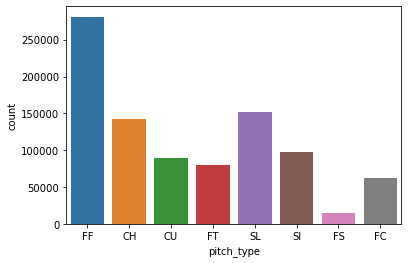

In [16]:
sns.countplot(x="pitch_type", data=df)

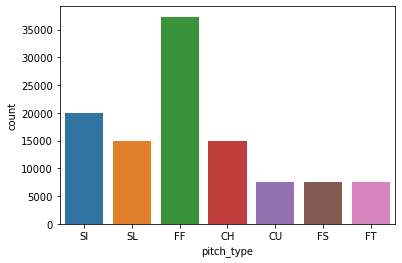

In [17]:
sns.countplot(x="pitch_type", data=df[df["count_balls"]==3])

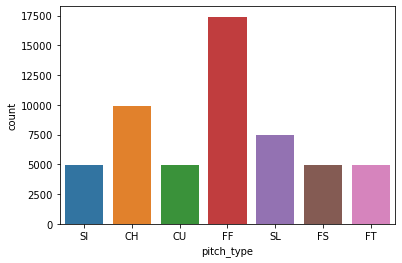

In [21]:
sns.countplot(x="pitch_type", data=df[(df["count_balls"]==3) & (df["count_strikes"]==2)])

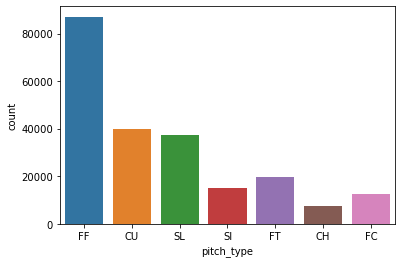

In [24]:
sns.countplot(x="pitch_type", data=df[(df["pitch_number"]==1)])

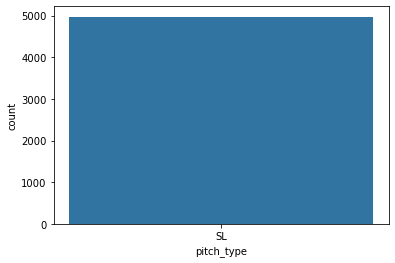

In [42]:
sns.countplot(x="pitch_type", data=df[(df["pitch_number"]==1) & (df["pitch_result"].isin(['D','E']))])

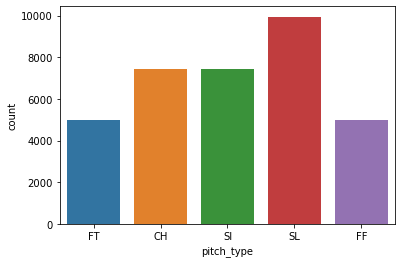

In [28]:
sns.countplot(x="pitch_type", data=df[(df["pitch_result"]=='D')])

In [37]:
df[(df["pitch_result"]=='E')]

,rowid,season,game,batter,batSide,count_balls,count_strikes,pitch_result,pitch_type,break_angle,break_length,spin_direction,spin_rate,end_speed,extension,plate_time,start_speed,pitch_number
17,17,2018,529407,544931,R,0,0,E,SL,6.0,6.0,154,2187.0,83.1,6.90,0.42,89.3,1
22,22,2018,529407,544931,R,2,2,E,FT,37.2,7.2,245,1976.0,85.1,6.59,0.40,92.7,5
45,45,2018,529407,592789,R,1,1,E,CH,36.0,7.2,247,1776.0,84.2,6.83,0.41,91.1,3
66,66,2018,529407,544931,R,3,1,E,CU,10.8,12.0,43,2615.0,73.7,6.28,0.47,79.4,5
99,99,2018,529407,592789,R,0,1,E,SI,34.8,6.0,237,2080.0,88.4,6.87,0.39,95.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917584,917584,2018,570335,572096,R,1,2,E,SL,8.4,7.2,105,2143.0,81.2,5.58,0.43,87.4,5
917598,917598,2018,570335,607457,R,3,1,E,FF,26.4,3.6,205,2316.0,86.6,6.29,0.40,93.2,5
917642,917642,2018,570335,593833,R,2,2,E,FC,9.6,4.8,162,2598.0,85.7,6.08,0.41,92.6,5
917656,917656,2018,570335,593833,R,1,2,E,FC,9.6,4.8,165,2643.0,87.0,6.24,0.40,93.8,6


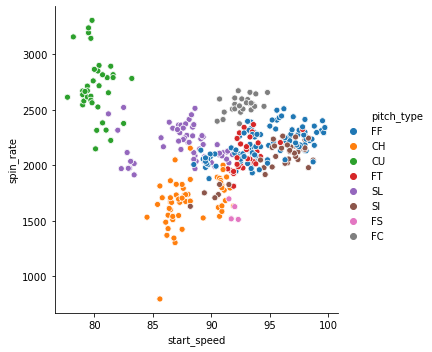

In [32]:
sns.relplot(x="start_speed",y="spin_rate",hue="pitch_type",data=df)

In [34]:
pp = pprint.PrettyPrinter(indent=4)

In [36]:
try:
    response = requests.get('https://statsapi.mlb.com/api/v1/game/565896/playByPlay')
    response.raise_for_status()
    
    # access JSON content
    jsonResponse = response.json()
    pp.pprint(jsonResponse["allPlays"][4])


except HTTPError as http_err:
    print(f'HTTP error occurred: {http_err}')
except Exception as err:
    print(f'Other error occurred: {err}')

{   'about': {   'atBatIndex': 4,
                 'captivatingIndex': 34,
                 'endTime': '2019-03-30T17:13:50.812Z',
                 'halfInning': 'top',
                 'hasOut': False,
                 'hasReview': False,
                 'inning': 1,
                 'isComplete': True,
                 'isScoringPlay': True,
                 'isTopInning': True,
                 'startTime': '2019-03-30T17:13:20.569Z'},
    'actionIndex': [],
    'atBatIndex': 4,
    'count': {'balls': 0, 'outs': 2, 'strikes': 0},
    'matchup': {   'batSide': {'code': 'R', 'description': 'Right'},
                   'batter': {   'fullName': 'Wilson Ramos',
                                 'id': 467092,
                                 'link': '/api/v1/people/467092'},
                   'batterHotColdZones': [],
                   'pitchHand': {'code': 'R', 'description': 'Right'},
                   'pitcher': {   'fullName': 'Stephen Strasburg',
                                 

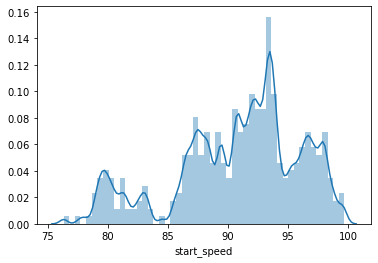

In [44]:
sns.distplot(df["start_speed"])

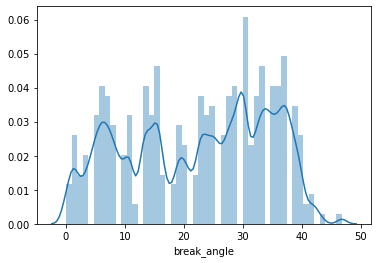

In [45]:
sns.distplot(df["break_angle"])

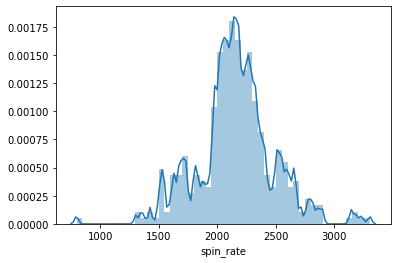

In [47]:
sns.distplot(df["spin_rate"])

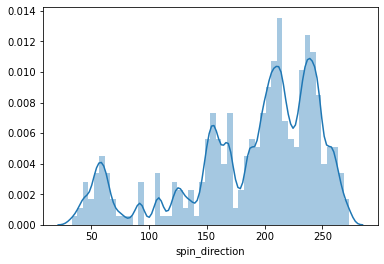

In [48]:
sns.distplot(df["spin_direction"])

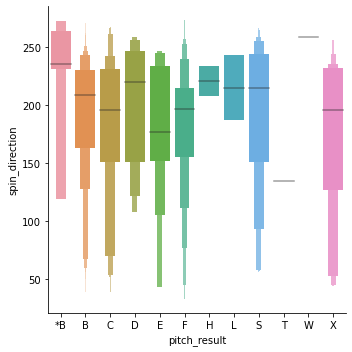

In [49]:
sns.catplot(x="pitch_result", y="spin_direction", kind="boxen",
            data=df.sort_values("pitch_result"));